<a href="https://colab.research.google.com/github/Artful-Donut/MachineLearning-Practice/blob/main/CAP4611%20-%20HW3%20-%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

This project asks you to perform various experiments with regression. The dataset we are using is taken from a real estate dataset (also used in HW2).

You will write code and discussion texts into code and text cells in this notebook.

If a block starts with TODO:, this means that you need to write something there.

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
Each subproblem is worth 10 pt.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk

## Setup for the first part of the homework

For problems P1 to P6 we are using a simple dataset where we extract one
explanatory variable ``sq_mt_built`` to predict the price of the house ``buy_price``

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
The lenght 21742
The columns of the database Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', '

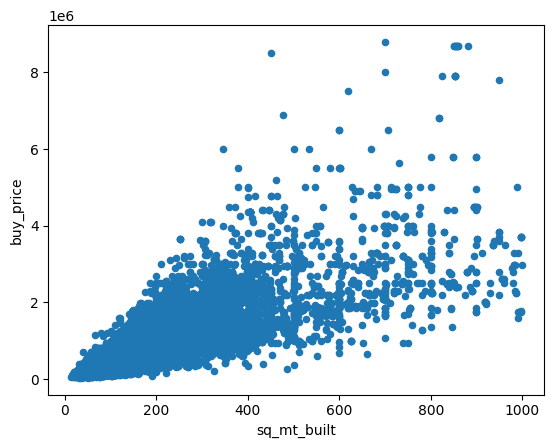

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
df = pd.read_csv('gdrive/My Drive/UCF/Spring Semester 2025/CAP4611/houses_Madrid.csv')

# df = pd.read_csv("houses_Madrid.csv")
print(f"The lenght {len(df.index)}")
print(f"The columns of the database {df.columns}")
df[["sq_mt_built", "buy_price"]].plot.scatter(x="sq_mt_built", y="buy_price")
## FIXME: add here the creation of the training data and test data

df_shuffled = df.sample(frac=1) # shuffle the rows

In [ ]:
x = df_shuffled["sq_mt_built"].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

In [ ]:
training_data_y

array([320000., 359900., 120000., ..., 285000., 890000., 180000.])

In [ ]:
training_data_x = np.nan_to_num(training_data_x, nan = 0.0)
training_data_y = np.nan_to_num(training_data_y, nan = 0.0)

test_data_x = np.nan_to_num(test_data_x, nan = 0.0)
test_data_y = np.nan_to_num(test_data_y, nan = 0.0)

## P1: Loss function
Implement a root-mean-square error (RMSE) loss function between the prediction $\hat{y}$ and $y$ value using Python operations. Run some experiments to validate that this works as expected.
Then, look up the same in the sklearn library
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
and implement it based on what is there.

In [ ]:
# TODO: implement the loss function here using Python math ops and sklearn
def loss_RMSE(y, yhat):
    se = 0
    for i in range(len(y)):
        se += (y[i] - yhat[i]) ** 2
    m = se / len(y)
    return np.sqrt(m)

def loss_RMSE_sk(y, yhat):
    return sk.metrics.root_mean_squared_error(y, yhat)

In [ ]:
# TODO: Now, run some experiments with your function, with the one taken with sklearn
# Compare their outputs.

y1 = np.empty(10); y1.fill(10)

print("Loss when y and yhat are the same")
print(f"Loss_RMSE: {loss_RMSE(y1, y1)}")
print(f"Loss_RMSE_sk: {loss_RMSE_sk(y1, y1)}")

y2 = []
for i in y:
  y2.append(i * 100)


# Looks like they're about the same. Yipee!!
print("Loss with buy price * 100 + 0")
print(f"Loss_RMSE: {loss_RMSE(y, y2)}")
print(f"Loss_RMSE_sk: {loss_RMSE_sk(y, y2)}")

Loss when y and yhat are the same
Loss_RMSE: 0.0
Loss_RMSE_sk: 0.0
Loss with buy price * 100 + 0
Loss_RMSE: 100911770.24323006
Loss_RMSE_sk: 100911770.24322882


## P2: Implement a linear predictor
Implement a function of type ``predict(x, theta) --> y_hat`` which implements a linear model of the type $\hat{y} = \theta_1 \cdot x + \theta_0$

In [ ]:
# TODO: implement the predictor function here
def predict(x, theta):
    y_hat = (x * theta[1]) + theta[0]
    return y_hat

In [ ]:
# TODO: now, run some experiments with it
print("Testing out prediction function")
tuples = [[0,1], [0,5], [1,1], [1,0], [2,10]]

for t in tuples:
  print()
  print(f"{t[1]}x + {t[0]}")
  for i in range(10):
    print(predict(i, t), end=' ')

Testing out prediction function

1x + 0
0 1 2 3 4 5 6 7 8 9 
5x + 0
0 5 10 15 20 25 30 35 40 45 
1x + 1
1 2 3 4 5 6 7 8 9 10 
0x + 1
1 1 1 1 1 1 1 1 1 1 
10x + 2
2 12 22 32 42 52 62 72 82 92 

## P3: Grid search
Implement a function ``grid_search()`` which returns an estimate of the best $\theta$ by trying out all the combinations of possibilities on a grid and returning the values that give you the most values.
gridx and gridy define the range of numbers that we want to explore. For instance, grid0 might be [0, 0.25, 0.5, 0.75, 1.0]

In [ ]:
# TODO: implement the grid search function here
def grid_search(training_data_x, training_data_y, grid0, grid1):
    theta = [0, 0]
    best_loss = float('inf')

    for i in grid0:
      for j in grid1:
        n_theta = [i, j]
        predict_y = []
        for data in training_data_x:
          predict_y.append(predict(data, n_theta))

        loss = loss_RMSE_sk(training_data_y, predict_y)

        if(loss < best_loss):
          # print(f"Theta {n_theta}, Loss: {loss}, Prev_Loss: {prev_loss}")
          theta = n_theta
          best_loss = loss

        prev_loss = loss


    return theta, best_loss

In [ ]:
# TODO: run some experiments with grid_search
# Define some grid values. Train it on the data set. Test it on the test set.
# Print the loss on the data set and the test set. Measure and print how long the training takes.
import time

begin = time.time()

gridx = [200.0, 300.0, 500.0, 800.0, 1000.0]
gridy = [3000.0, 3700.0, 4000.0, 4500.0, 4600.0]

best_theta, loss = grid_search(training_data_x, training_data_y, gridx, gridy)
end = time.time()

print(f"Best theta: {best_theta}, Loss: {loss}")
print(f"Time taken: {end-begin}")

print("With the test set:")
prediction = []
for data in test_data_x:
  prediction.append(predict(data, best_theta))

print(f"Loss: {loss_RMSE_sk(test_data_y, prediction)}")

Best theta: [800.0, 4500.0], Loss: 514472.10718100227
Time taken: 0.2792384624481201
With the test set:
Loss: 485564.60711680574


In [ ]:
# TODO: repeat the experimentation from above with different grids.
# Finally, print the grid that provides the best value while still running faster
# than 10 seconds.

gridx = []

for i in range(5):
  new_grid = []
  for j in range(5):
    new_grid.append(i * 1000 + j * 100)
  gridx.append(new_grid)
print(gridx)
gridy = []

for i in range(5):
  new_grid = []
  for j in range(5):
    new_grid.append(i * 5000 + j * 200)
  gridy.append(new_grid)
print(gridy)


best_loss = loss = float('inf')
best_grid = []
best_theta = []

for i in gridx:
  for j in gridy:
    begin = time.time()
    theta, loss = grid_search(training_data_x, training_data_y, i, j)
    end = time.time()
    elapsed = end - begin
    if(elapsed < 10 and loss < best_loss):
      best_theta = theta
      best_loss = loss
      best_grid = [i, j]

print(f"Best theta: {best_theta}, Loss: {best_loss}")
print(f"Time taken: {end-begin}")
print(f"Best grid: {best_grid}")

print("With the test set:")
prediction = []
for data in test_data_x:
  prediction.append(predict(data, best_theta))

print(f"Loss: {loss_RMSE_sk(test_data_y, prediction)}")


[[0, 100, 200, 300, 400], [1000, 1100, 1200, 1300, 1400], [2000, 2100, 2200, 2300, 2400], [3000, 3100, 3200, 3300, 3400], [4000, 4100, 4200, 4300, 4400]]
[[0, 200, 400, 600, 800], [5000, 5200, 5400, 5600, 5800], [10000, 10200, 10400, 10600, 10800], [15000, 15200, 15400, 15600, 15800], [20000, 20200, 20400, 20600, 20800]]
Best theta: [0, 5000], Loss: 523784.7090187539
Time taken: 0.146148681640625
Best grid: [[0, 100, 200, 300, 400], [5000, 5200, 5400, 5600, 5800]]
With the test set:
Loss: 502409.35191633995


## P4: Random search
Implement a function that returns the estimate for the best $\theta$ by trying out random
$\theta=[\theta_0, \theta_1]$ values, and returning the one that minimizes the error on the training set passed to it. The number of tries is described in the ``trials`` parameter.

In [ ]:
# TODO: implement the random search function here
def random_search(training_data_x, training_data_y, trials):
    theta = [0, 0]
    best_loss = float('inf')

    for i in range(trials):
      n_theta = [np.random.random() * training_data_y.max() / 10, np.random.random() * training_data_y.max() / 10]

      predict_y = []
      for data in training_data_x:
          predict_y.append(predict(data, n_theta))

      loss = loss_RMSE_sk(training_data_y, predict_y)

      if(loss < best_loss):
        theta = n_theta
        best_loss = loss

    return theta, best_loss

In [ ]:
# TODO: run some experiments with random_search
# Choose some value for trial. Train it on the data set. Test it on the test set.
# Print the loss on the data set and the test set. Measure and print how long the training takes.

begin = time.time()

best_theta, loss = random_search(training_data_x, training_data_y, 5000)
end = time.time()

print(f"Best theta: {best_theta}, Loss: {loss}")
print(f"Time taken to train: {end-begin}")


print("With the test set:")
prediction = []
for data in test_data_x:
  prediction.append(predict(data, best_theta))

print(f"Loss: {loss_RMSE_sk(test_data_y, prediction)}")

Best theta: [79825.40947127058, 4005.45263693739], Loss: 518525.13847652735
Time taken to train: 31.871904134750366
With the test set:
Loss: 486697.65856209025


## P5: Improvements
Propose an improvement to the algorithms you have implemented for 3 and 4 and show that with your improvement, the performance is better than the original. Some examples of what you might try:
* Choose values for $\theta_0$ and $\theta_1$ on a non-uniform grid
* First find one of them, and fix it, and then refine on the other one
* For random: sample according to a non-uniform distribution
* First use a low resolution search to find the approximate values of  $\theta_0$ and $\theta_1$, then search for a more precise value

In [ ]:
# TODO: implement your improvements here
gridx = [np.random.randint(0,10000, (10)), np.random.randint(0,10000, (15)), np.random.randint(0,10000, (3)), np.random.randint(0,10000, (5)), np.random.randint(0,10000, (1))]
print(gridx)
gridy = [np.random.randint(0,10000, (10)), np.random.randint(0,10000, (3)), np.random.randint(0,10000, (7)), np.random.randint(0,10000, (7))]
print(gridy)


best_loss = loss = float('inf')
best_grid = []
best_theta = []

for i in gridx:
  for j in gridy:
    begin = time.time()
    theta, loss = grid_search(training_data_x, training_data_y, i, j)
    end = time.time()
    elapsed = end - begin
    if(elapsed < 10 and loss < best_loss):
      best_theta = theta
      best_loss = loss
      best_grid = [i, j]

print(f"Best theta: {best_theta}, Loss: {best_loss}")
print(f"Time taken: {end-begin}")
print(f"Best grid: {best_grid}")


[array([4329, 2907, 1632, 2949, 5113, 3658, 6044, 6231, 7191, 3307]), array([7874, 6265, 6499, 1616, 3623, 8877, 8676,  425, 3240, 5622, 1716,
       6005, 1107, 9833, 2182]), array([7439,  306, 6373]), array([7754, 5568, 8553, 7870, 1686]), array([9465])]
[array([9233, 1211, 2473, 8722, 9637, 4080, 2068, 2470, 4573, 7860]), array([5058, 9310, 4292]), array([1492, 9308, 5019, 9777,  546, 4383, 7523]), array([ 966, 8630, 6633,  497,   58, 6772, 6539])]
Best theta: [306, 4573], Loss: 514681.7087867009
Time taken: 0.05485200881958008
Best grid: [array([7439,  306, 6373]), array([9233, 1211, 2473, 8722, 9637, 4080, 2068, 2470, 4573, 7860])]


TODO: Describe in one paragraph the conclusions you have drawn from your improvement experiments

---

I decided to implement my grid_search() function with non-uniform grids with the np.random.randint() function. I believe I used fewer values for the grids, which is why the time taken for this is about halved- but even so, the values that the grid_search() found ended up having a better loss value than the uniform grids. In short, I think implementing grid search with non-uniform grids is a much better method of finding theta.

## P6: Using the sklearn library for linear regression

Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed.

In [ ]:
# TODO: Implement here
from sklearn.model_selection import train_test_split

def linear_regression(training_data_x, training_data_y, test_data_x, test_data_y):
    training_data_x = training_data_x.reshape(-1, 1)
    test_data_x = test_data_x.reshape(-1, 1)

    model = sk.linear_model.LinearRegression()
    model.fit(training_data_x, training_data_y)
    return model.predict(test_data_x), test_data_y

TODO: discuss the performance of the sklearn library implementation, compared to what you implemented.

---

Implementing the sklearn library to fit the model was a lot faster and more accurate than my implementations of grid search and random search. Grid search and Random search took seconds, while using sklearn took less than a second.

The sklearn library's effectiveness was comparable to the effectiveness of Grid Search, though (I ended up using random values for my grids, but the point still stands, I would think). Random search, however, lagged behind in effectiveness (this makes sense, however, as my interval for random search was quite large, so the chance of bumping into the optimal value was low). It also took longer, though I believe my implementation of random search involved more steps than my implementation of grid search did.

In [ ]:
# TODO: Run performance experiments here.
import time

begin = time.time()

print("Effectiveness of Model:")
predict, test_y = linear_regression(training_data_x, training_data_y, test_data_x, test_data_y)
print(f"Loss: {loss_RMSE_sk(test_y, predict)}")

# store end time
end = time.time()
print(f"Time taken: {end-begin}")



Effectiveness of Model:
Loss: 493574.85951772565
Time taken: 0.27983665466308594


# Setup for the second part of the project
For the questions P7-P10 we use linear regression on a multivariate setting. This time, there are 7 explanatory variables: ``sq_mt_built``, ``n_rooms``, ``n_bathrooms``, ``is_renewal_needed``, ``is_new_development`` and ``has_fitted_wardrobes``.

We will first create the training and test data while doing some minimal data cleaning.

In [ ]:
# replacing the NA values with some sensible defaults
# the way I was investigating these is by printing
#    df["has_individual_heeating"].value_counts(dropna=False) etc
df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["n_bathrooms"] = df_shuffled["n_bathrooms"].fillna(1)
df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
df_shuffled["has_fitted_wardrobes"] = df_shuffled["has_fitted_wardrobes"].fillna(False)

xfields = ["sq_mt_built", "n_rooms", "n_bathrooms", "has_individual_heating", \
           "is_renewal_needed", "is_new_development", "has_fitted_wardrobes"]

x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled["buy_price"].to_numpy(dtype=np.float64)
training_data_x = x[:16000]
training_data_y = y[:16000]
test_data_x = x[16000:]
test_data_y = y[16000:]

<ipython-input-17-abe5b5c90550>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shuffled["has_individual_heating"] = df_shuffled["has_individual_heating"].fillna(False)
<ipython-input-17-abe5b5c90550>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shuffled["is_new_development"] = df_shuffled["is_new_development"].fillna(False)
<ipython-input-17-abe5b5c90550>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to th

In [ ]:
training_data_x

training_data_x = np.nan_to_num(training_data_x, nan = 0.0)
training_data_y = np.nan_to_num(training_data_y, nan = 0.0)
test_data_x = np.nan_to_num(test_data_x, nan = 0.0)
test_data_y = np.nan_to_num(test_data_y, nan = 0.0)

## P7: Grid search for multiple variables
Implement the linear predictor model for multiple variables. Note that this time ``x`` will be an array of 7 values, and ``theta`` will be an array of 8 values.

Then, implement a grid search function (similar to P3) but this time for the 7 explanatory variables. Pass the grids as an array into the grid variable.

In [ ]:
# TODO: implement the predictor function here
def predict_multi(x, theta):
    y_hat = []
    for data in x:
        n_yhat = 0
        for i in range(7):
          n_yhat += data[i] * theta[i+1]
        n_yhat += theta[0]
        y_hat.append(n_yhat)

    y_hat += theta[0]
    return y_hat

# TODO: implement the grid search function here
def grid_search(training_data_x, training_data_y, grids):
    theta = [0, 0, 0, 0, 0, 0, 0, 0]
    best_loss = float('inf')

    for t1 in grids[0]:
      for t2 in grids[1]:
        for t3 in grids[2]:
          for t4 in grids[3]:
            for t5 in grids[4]:
              for t6 in grids[5]:
                for t7 in grids[6]:
                  for t8 in grids[7]:
                    n_theta = [t1, t2, t3, t4, t5, t6, t7, t8]

                    predict_y = predict_multi(training_data_x, n_theta)
                    loss = loss_RMSE_sk(training_data_y, predict_multi(training_data_x, predict_y))

                    if(best_loss > loss):
                        theta = n_theta
                        best_loss = loss

    return theta, best_loss

In [ ]:
# TODO: run experiments with your implementation for the grid search
import time
grids = []

for i in range(8):
  grids.append(np.random.randint(0,10000, (2)))
print(grids)

begin = time.time()
best_theta, loss = grid_search(training_data_x, training_data_y, grids)
end = time.time()

print(f"Training Time: {end - begin}")
print(f"Best Theta: {best_theta}, Best Loss: {loss}")

print(f"Loss: {loss_RMSE(predict_multi(test_data_x, best_theta), test_data_y)}")

[array([4567, 5392]), array([7903, 3596]), array([2165, 7185]), array([7858, 6057]), array([2747, 9071]), array([4244, 6394]), array([5662, 2772]), array([2707,  123])]
Training Time: 29.504361391067505
Best Theta: [4567, 3596, 2165, 6057, 2747, 4244, 5662, 123], Best Loss: 52733504.24062279
Loss: 511711.10092462436


TODO: describe here your experiences with implementing this problem, conclusions you draw.

---

The implementation is relatively simple in logic, and I was able to get a comparable loss to the simple regression trials.

However... the amount of iterations needed to calculate grid_search is n^m, where n is the amount of grids and m is the size of those grids. My grids only had 2 values each, but it took nearly 30 seconds to train the model. I shiver to think about how much it would scale if I gave grids more values...

This is computationally expensive and unreasonable for very large datasets (and it took forever to run).

So while grid search was very thorough, I would not use it for a dataset like the one used for this homework.

## P8: Random search for multiple variables
Implement the random search technique for the multiple variables.

In [ ]:
# TODO: implement the random seeach function here
def random_search(training_data_x, training_data_y):
    best_theta = [0, 0, 0, 0, 0, 0, 0, 0]
    best_loss = float('inf')

    # choosing an arbitrary amount of iterations
    for i in range(200):
      theta = np.random.randint(0, training_data_y.max() / 2, (8))
      predict_y = predict_multi(training_data_x, theta)
      loss = loss_RMSE_sk(training_data_y, predict_y)

      if(best_loss > loss):
        best_loss = loss
        best_theta = theta

    return best_theta, best_loss

In [ ]:
# TODO: run experiments with your implementation for the
best_theta = []
best_loss = float('inf')
for i in range(10):
  print(f"Test {i}")
  begin = time.time()
  theta, loss = random_search(training_data_x, training_data_y)
  end = time.time()

  print(f"Training Time: {end - begin}")
  print(f"Best Iteration Theta: {theta}, Best Iteration Loss: {loss}")

  if(loss < best_loss):
    best_loss = loss
    best_theta = theta

print(f"Best Theta: {best_theta}, Best Loss: {best_loss}")

print("Testing:")
print(f"Loss: {loss_RMSE(predict_multi(test_data_x, best_theta), test_data_y)}")

Test 0
Training Time: 14.661410570144653
Best Iteration Theta: [2410452   69177  114802 1437414  745983 2106382  386071 2657910], Best Iteration Loss: 22614474.3985224
Test 1
Training Time: 14.805427551269531
Best Iteration Theta: [1459207   36987  794168  131108  176900 1918216 4332693  901609], Best Iteration Loss: 12845732.4991373
Test 2
Training Time: 14.970728158950806
Best Iteration Theta: [3009205   92410 1599585  317071  274342 4093512 1913518 1585369], Best Iteration Loss: 29783818.209338468
Test 3
Training Time: 14.746150016784668
Best Iteration Theta: [ 490229   74248  238516 1460706  650961 3991826 3571381 2979060], Best Iteration Loss: 21394972.223238703
Test 4
Training Time: 14.708160161972046
Best Iteration Theta: [2406869   10246 2081199  528632 1205144 1909153 1076554 2254712], Best Iteration Loss: 15999965.693307403
Test 5
Training Time: 14.731117486953735
Best Iteration Theta: [1985295   23109  513759 2043477 3969399 1227428 2203132  600484], Best Iteration Loss: 160

TODO: describe here your experiments with the implementation for the random search

---

The implementation was a lot faster, as I didn't have to make multiple nested loops. However, my losses were astronomical, as it was hard to choose an interval that would give me values that fit the model.

Additionally, while the actual testing ended up taking longer than grid search, each iteration of random search had 200 steps, so doing 10 tests would give me 2000 total steps- which is a lot more than my small grid search would yield at a similar level.

## P9: Use sklearn for linear regression in multiple variables
Use ``sklearn.linear_model.LinearRegression`` to solve the same problem you previously solved using the grid search and random search.

Compare the returned values with what you have achieved. Compare the parameters that had been found to the parameters you have found. Compare the speed.


---


I realize that the model returned negative values for some of the thetas, so my implementations probably haven't been fitting very well because of that (I bounded all of my values at 0). Still, my implementation got as close as possible to sklearn's values, so I can't say my way wasn't effective at all.

As with the simple linear regression, the sklearn library was both faster and more effective, taking less than a second and having the lowest loss yet.

In [ ]:
# TODO: implement here
def linear_regression(training_data_features):
  model = sk.linear_model.LinearRegression()

  model.fit(training_data_features, training_data_y)

  print("Optimal coefficients:")
  print(model.coef_)
  print(f"Optimal intercept: {model.intercept_}")
  return model.predict(test_data_x), test_data_y

In [ ]:
# TODO: run experiments here.
print("Effectiveness of Model:")
begin = time.time()
predict, test_y = linear_regression(training_data_x)
end = time.time()

print(f"Time taken: {end-begin}")
print(f"Loss: {loss_RMSE_sk(test_y, predict)}")


Effectiveness of Model:
Optimal coefficients:
[  2296.99015368  -5759.56172917 266061.05012341 -70557.66579111
  23357.6031181  -85071.90074627 -12591.43761166]
Optimal intercept: -181288.48931290733
Time taken: 0.012474775314331055
Loss: 448229.5203501845


TODO: describe in one paragraph your experiences with implementing the multiple variable linear regression.

---

Multiple variable linear regression isn't too different from simple variable linear regression- the difference comes with dealing with the x-values (which was represented with n-arrays, rather than single integers). All I changed was adding more values to the theta array, and using more loops (the grid_search in particular was a mess of nested for loops). Naturally, everything took longer to execute, because of course trying to minimize the loss of 8 different thetas is going to take longer than only finding 2. This would've been frustrating, but I kept my test values low because I didn't want to wait 15 minutes for it to finish.

TODO: describe in one paragraph your experiences with the data wrangling process.

---

Data wrangling in general was really annoying. For simple linear regression and multiple linear regression, I had a lot of NaN values- so I had to cut them out of the training values for x and y (I also did the same for the testing values just in case). Afterwards, the data worked well. I also had issues with understanding how the features in the multivariate example was put into the array, which led to a lot of index out of bound errors. Once I figured it out, though, it was very easy to continue.

## P10: Explore other linear regression techniques

Explore the use of other models provided from the sklearn library for linear regression.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Try out two of them of your choice. Explain the results you obtained and compare them with other approaches.

---

As expected, using Ridge and Lasso regression models provided very similar results to the linear regression model. The values differed slightly- but not in a significant manner. The performance was also practically the same as they all executed in less than a second, though Lasso regression was the fastest by .001 and ridge regression was the slowest by .01. How interesting.

Naturally, all of the models from sklearn outclassed mine, but that's because I chose values that weren't very optimal for my grids and random searches.


In [ ]:
from sklearn import linear_model

def lasso_regression():
  # Using Lasso module with alpha=0.1
  model = linear_model.Lasso(alpha=0.1)
  model.fit(training_data_x, training_data_y)
  print(f"Optimal intercept: {model.intercept_}")
  return model.predict(test_data_x), loss_RMSE_sk(test_data_y, model.predict(test_data_x)), model.coef_

def ridge_regression():
  # Using Ridge module with alpha=1.0
  model = linear_model.Ridge(alpha=1.0)
  model.fit(training_data_x, training_data_y)
  print(f"Optimal intercept: {model.intercept_}")
  return model.predict(test_data_x), loss_RMSE_sk(test_data_y, model.predict(test_data_x)), model.coef_

In [ ]:
print("Testing Lasso regression:")
begin = time.time()
predict, loss, coef = lasso_regression()
end = time.time()

print(f"Time taken: {end-begin}")
print(f"Loss: {loss}")
print(f"Coefficients: {coef}")

print("Testing Ridge regression:")
begin = time.time()
predict, loss, coef = ridge_regression()
end = time.time()

print(f"Time taken: {end-begin}")
print(f"Loss: {loss}")
print(f"Coefficients: {coef}")

Testing Lasso regression:
Optimal intercept: -181289.3405918791
Time taken: 0.11123490333557129
Loss: 448229.50824222417
Coefficients: [  2296.99100275  -5759.27207167 266060.69308987 -70557.17298546
  23357.03061385 -85069.85084401 -12590.86434857]
Testing Ridge regression:
Optimal intercept: -181315.31765617535
Time taken: 0.02230381965637207
Loss: 448228.0450497764
Coefficients: [  2297.1469603   -5744.92830343 266029.35640635 -70532.23804046
  23348.97072063 -84963.42116359 -12576.2997471 ]
